<a href="https://colab.research.google.com/github/mohdshahjada3-star/Smart-Health-Advisor/blob/main/Smart_Health_Advisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# CELL 1 - Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [43]:
# CELL 2 - Load Dataset
from google.colab import files

uploaded = files.upload()  # Upload CSV file

# Get first uploaded file name
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

df.head()


Saving hospital_health_dataset_10k_generated.csv to hospital_health_dataset_10k_generated (3).csv


,Patient_ID,Name,Age,Gender,Height_cm,Weight_kg,BMI,Blood_Pressure,Systolic,Diastolic,...,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Existing_Diseases,Predicted_Risk_Level,Medication,Medication_List,Admission_Date,Discharge_Date,Outcome
0,P100001,Vihaan Sharma,53,Female,157.0,68.7,27.9,154/76,154,76,...,Never,No,Weekly,NaN,Medium,No,NaN,2025-02-11,2025-02-17,Healthy
1,P100002,Aditya Saxena,36,Male,174.3,70.1,23.1,122/77,122,77,...,Never,Occasional,Weekly,Diabetes,Low,Yes,Metformin,2025-02-10,2025-02-10,Recovered
2,P100003,Kavya Saxena,28,Male,158.7,77.1,30.6,121/74,121,74,...,Current,Occasional,Occasional,Obesity,Medium,Yes,Symptomatic,2020-09-28,2020-09-28,Recovered
3,P100004,Aisha Singh,34,Male,167.7,63.2,22.5,149/74,149,74,...,Current,Occasional,Weekly,NaN,Low,No,NaN,2024-02-25,2024-03-01,Healthy
4,P100005,Neha Singh,48,Female,144.3,41.3,19.8,136/83,136,83,...,Never,Occasional,Weekly,NaN,Low,No,NaN,2023-01-21,2023-01-22,Healthy


In [44]:
# CELL 3 - Encode Categorial Features
# Identify categorical columns
categorical_cols = ["Gender", "Cholesterol", "Smoking_Status", "Alcohol_Consumption", "Exercise_Frequency", "Existing_Diseases"]

# Create encoders for each categorical column
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Define features and target
feature_cols = ["Age", "Gender", "Height_cm", "Weight_kg", "BMI",
                "Systolic", "Diastolic", "Heart_Rate_bpm", "Sugar_mg_dL"] + categorical_cols

target_col = "Predicted_Risk_Level"  # Should be Low, Medium, High
y = df[target_col]
X = df[feature_cols]

In [45]:
# CELL 4 - Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# CELL 5 - Train Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.889
              precision    recall  f1-score   support

        High       0.95      0.74      0.83       390
         Low       0.88      0.91      0.89       498
      Medium       0.88      0.93      0.90      1112

    accuracy                           0.89      2000
   macro avg       0.90      0.86      0.88      2000
weighted avg       0.89      0.89      0.89      2000



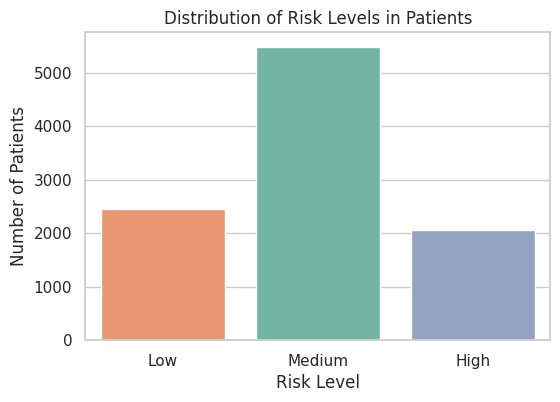

In [47]:
# CELL 6 - Plot Histogram of Risk Levels
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x='Predicted_Risk_Level', data=df, order=['Low', 'Medium', 'High'], palette='Set2', hue='Predicted_Risk_Level', legend=False)
plt.title("Distribution of Risk Levels in Patients")
plt.xlabel("Risk Level")
plt.ylabel("Number of Patients")
plt.show()

In [48]:
# CELL 7 - Ruled-Based Emergency Check
def check_emergency(patient):
    if patient["Systolic"] >= 180 or patient["Diastolic"] >= 120:
        return "High"
    if patient["Sugar_mg_dL"] >= 250:
        return "High"
    return None  # Use ML prediction if not emergency


In [49]:
# CELL 8 - Get User Input
def get_patient_input():
    print("\n====== ENTER PATIENT DETAILS ======\n")
    age = int(input("Age: "))
    gender = input("Gender (Male/Female/Other): ").strip().title()
    height = float(input("Height (cm): "))
    weight = float(input("Weight (kg): "))
    bmi = round(weight / ((height/100)**2), 2)
    print(f"Calculated BMI: {bmi}\n")

    systolic = int(input("Systolic BP: "))
    diastolic = int(input("Diastolic BP: "))
    heart_rate = int(input("Heart Rate (bpm): "))
    sugar = int(input("Sugar (mg/dL): "))
    cholesterol = input("Cholesterol (Normal/Borderline/High): ").strip().title()
    smoking = input("Do you smoke? (Yes/No): ").strip().title()
    alcohol = input("Alcohol consumption? (Yes/No): ").strip().title()
    exercise = input("Exercise Frequency (Daily/Weekly/Never): ").strip().title()
    existing = input("Existing Diseases (None / Diabetes / BP / Thyroid): ").strip().title()

    return {
        "Age": age, "Gender": gender, "Height_cm": height, "Weight_kg": weight, "BMI": bmi,
        "Systolic": systolic, "Diastolic": diastolic, "Heart_Rate_bpm": heart_rate,
        "Sugar_mg_dL": sugar, "Cholesterol": cholesterol, "Smoking_Status": smoking,
        "Alcohol_Consumption": alcohol, "Exercise_Frequency": exercise, "Existing_Diseases": existing
    }


In [50]:
# CELL 9 - Encode User Input
def encode_user(patient, encoders):
    encoded = {}
    for col, val in patient.items():
        if col in encoders:
            le = encoders[col]
            val = str(val).strip().title()
            if val in le.classes_:
                encoded[col] = le.transform([val])[0]
            else:
                # fallback if unseen category
                encoded[col] = le.transform([le.classes_[0]])[0]
        else:
            encoded[col] = val
    return encoded


In [51]:
# CELL 10 - Predict Risk
def predict_risk(patient):
    # Check emergency first
    emergency_risk = check_emergency(patient)
    if emergency_risk:
        return emergency_risk

    # Encode and predict
    patient_encoded = encode_user(patient, encoders)
    X_input = pd.DataFrame([patient_encoded])[feature_cols]
    pred = model.predict(X_input)[0]
    return pred


In [52]:
# CELL 11 - Professional Output
def professional_output(risk, patient):
    print("\n================= HEALTH REPORT =================")
    print(f"Predicted Risk Level: **{risk.upper()}**")
    print("=================================================\n")

    print("📊 DETAILED ANALYSIS")
    if patient["Systolic"] >= 140 or patient["Diastolic"] >= 90:
        print("- ⚠️ High Blood Pressure detected")
    if patient["BMI"] >= 30:
        print("- ⚠️ Obesity increases heart & diabetes risk")
    if patient["Sugar_mg_dL"] >= 140:
        print("- ⚠️ High sugar levels → Pre-diabetes risk")
    if patient["Exercise_Frequency"].lower() == "never":
        print("- ⚠️ No physical activity increases risk")
    if patient["Smoking_Status"].lower() == "yes":
        print("- ⚠️ Smoking increases lung & heart disease risk")
    if patient["Alcohol_Consumption"].lower() == "yes":
        print("- ⚠️ Regular alcohol consumption can elevate BP & liver stress")

    print("\n🩻 MEDICAL ADVICE")
    if risk == "High":
        print("➡️ Strongly recommended: Consult a doctor immediately.")
    elif risk == "Medium":
        print("➡️ Suggested: Lifestyle changes & follow-up tests.")
    else:
        print("➡️ Good! Maintain a healthy lifestyle!")
    print("=================================================")


In [53]:
# CELL 12 - Run Full Pipeline
patient = get_patient_input()
risk = predict_risk(patient)
professional_output(risk, patient)



====== ENTER PATIENT DETAILS ======

Age: 18
Gender (Male/Female/Other): Male
Height (cm): 168
Weight (kg): 65
Calculated BMI: 23.03

Systolic BP: 150
Diastolic BP: 100
Heart Rate (bpm): 99
Sugar (mg/dL): 250
Cholesterol (Normal/Borderline/High): High
Do you smoke? (Yes/No): No
Alcohol consumption? (Yes/No): No
Exercise Frequency (Daily/Weekly/Never): Daily
Existing Diseases (None / Diabetes / BP / Thyroid): None

================= HEALTH REPORT =================
Predicted Risk Level: **HIGH**

📊 DETAILED ANALYSIS
- ⚠️ High Blood Pressure detected
- ⚠️ High sugar levels → Pre-diabetes risk

🩻 MEDICAL ADVICE
➡️ Strongly recommended: Consult a doctor immediately.
